# Alpha learner

This notebook trains machine learning models that predict alphas and related
features of Collatz sequences

## Meta data

In [1]:
"""
This notebook trains machine learning models that predict alphas and related
features of Collatz sequences. It builds on a sample of sequences, stored in the csv file:
data/alpha_export.csv. The file can be generated by executing the script
run_alpha_export.py.
"""

# Imports
# Fix possible import problems
import sys
sys.path.append("../..")

from pathlib import Path
from math import log2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, tree
from sklearn.model_selection import train_test_split


# Configuration
DATA_PATH = Path.cwd().parent.parent.as_posix() + "/data/"
CSV_PATH = DATA_PATH + "alpha_export.csv"

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Load data from csv
analysis_frame = pd.read_csv(
    CSV_PATH, dtype={
        "v_i": object, "kv_i+1": object, "v_i+" : object,
        "v_1_bin" : str, "v_i_bin" : str})

# Filter data set
K_FACTOR = 3
analysis_frame = analysis_frame[analysis_frame["k"] == K_FACTOR]

sequence_count = int(analysis_frame["sequence_id"].nunique())
print("K:", K_FACTOR)
print("Collatz sequences in sample:", sequence_count, "\n")

# Derive additional features
analysis_frame["b_log2"] = analysis_frame["b"].apply(log2)
analysis_frame["v_1_log2"] = analysis_frame["v_1"].apply(log2)
analysis_frame["v_1_log_frac"] = analysis_frame["v_1_log2"] % 1

# Split Training and Test set
training_frame, test_frame = train_test_split(analysis_frame, test_size=0.3)

print("Size training set: ", len(training_frame))
print("Size test set: ", len(test_frame))

K: 3
Collatz sequences in sample: 2000 

Size training set:  38369
Size test set:  16445


## Predict $\alpha$

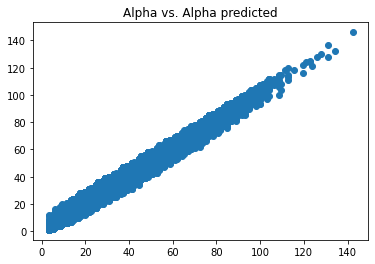

Linear Model
Intercept: 0.0
Features: ['l_max']
Coeff: [1.03238993]
R^2: 0.9813074296315101


In [2]:
# Features
alpha_target = "a"
alpha_features = ["l_max"]

# Create Training Set
alpha_training_target = training_frame[alpha_target]
alpha_training_features = training_frame[alpha_features]

# Create Test set
alpha_test_target = test_frame[alpha_target]
alpha_test_features = test_frame[alpha_features]

# Train Linear Model
alpha_regression = linear_model.LinearRegression()
alpha_regression.fit_intercept = False
alpha_regression.fit(alpha_training_features, alpha_training_target)

# Test Model
alpha_predicted = alpha_regression.predict(alpha_test_features)

plt.figure()
plt.title("Alpha vs. Alpha predicted")
plt.plot(alpha_predicted, alpha_test_target,  "o")
plt.show()

print("Linear Model")
print("Intercept:", alpha_regression.intercept_)
print("Features:", alpha_features)
print("Coeff:", alpha_regression.coef_)
print("R^2:", alpha_regression.score(
    alpha_training_features, alpha_training_target))

## Predict $\log_2 \beta$

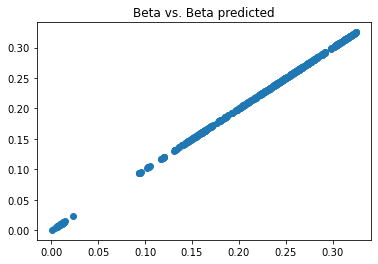

Linear Model
Intercept: 0.0
Features: ['v_1_log2', 'a', 'n']
Coeff: [-1.         1.        -1.5849625]
R^2: 1.0


In [3]:
# Features
beta_target = "b_log2"
beta_features = ["v_1_log2", "a", "n"]

# Create Training Set
beta_training_frame = training_frame[training_frame["terminal"] == True]
beta_training_target = beta_training_frame[beta_target]
beta_training_features = beta_training_frame[beta_features]

# Create Test set
beta_test_frame = test_frame[test_frame["terminal"] == 1]
beta_test_target = beta_test_frame[beta_target]
beta_test_features = beta_test_frame[beta_features]

# Train Linear Model
beta_regression = linear_model.LinearRegression()
beta_regression.fit_intercept = False
beta_regression.fit(beta_training_features, beta_training_target)

# Test Model
beta_predicted = beta_regression.predict(beta_test_features)

plt.figure()
plt.title("Beta vs. Beta predicted")
plt.plot(beta_predicted, beta_test_target,  "o")
plt.show()

print("Linear Model")
print("Intercept:", beta_regression.intercept_)
print("Features:", beta_features)
print("Coeff:", beta_regression.coef_)
print("R^2:", beta_regression.score(
    beta_training_features, beta_training_target))
